In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [3]:
start = '2010-01-01'
end = '2020-12-31'
df = data.DataReader('AAPL','yahoo',start,end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.352829
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.050766
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.239273
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.094650
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.069473


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.462008
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.562591
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.573935
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.469369
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.457407


In [6]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


/Users/temp/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/temp/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1368: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


<AxesSubplot:xlabel='Close'>

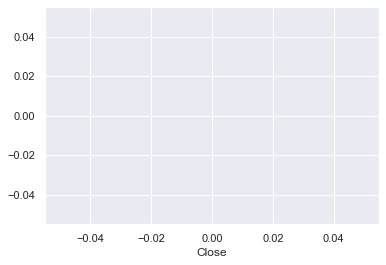

In [8]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(df.Close)
#plt.plot(df.Close)


ma100 is moving average of 100 days

In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

In [ ]:
plt.plot(ma100)

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

analysts use this ma100 and ma200 to classify if stock is going up or down.
if ma100 crosses ma200(goes up), it is a trending upwards stock


In [ ]:
df.shape

In [ ]:
#splitting data into training and testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

In [ ]:
data_training.head()

we will scale down data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [49]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01953359],
       [0.02296349],
       [0.0233504 ],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [ ]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
# ML model

In [33]:
pip install tensorflow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [36]:
from keras.layers import Dense, Dropout,LSTM

In [37]:
from keras.models import Sequential

In [39]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu',return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units=60, activation = 'relu',return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units=80, activation = 'relu',return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units=1))


In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)              

In [41]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs = 50)


Epoch 1/50
58/58 [==============================] - 16s 176ms/step - loss: 0.0476
Epoch 2/50
58/58 [==============================] - 11s 190ms/step - loss: 0.0105
Epoch 3/50
58/58 [==============================] - 11s 193ms/step - loss: 0.0084
Epoch 4/50
58/58 [==============================] - 12s 204ms/step - loss: 0.0074
Epoch 5/50
58/58 [==============================] - 13s 225ms/step - loss: 0.0071
Epoch 6/50
58/58 [==============================] - 15s 256ms/step - loss: 0.0077
Epoch 7/50
58/58 [==============================] - 12s 205ms/step - loss: 0.0072
Epoch 8/50
58/58 [==============================] - 14s 242ms/step - loss: 0.0059
Epoch 9/50
58/58 [==============================] - 24s 409ms/step - loss: 0.0056
Epoch 10/50
58/58 [==============================] - 21s 365ms/step - loss: 0.0059
Epoch 11/50
58/58 [==============================] - 14s 238ms/step - loss: 0.0053
Epoch 12/50
58/58 [==============================] - 10s 174ms/step - loss: 0.0049
Epoch 13/50
5

In [43]:
model.save('keras_model.h5')

In [44]:
data_testing.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [45]:
data_training.tail()

,Close
1933,40.477501
1934,40.314999
1935,39.657501
1936,40.375000
1937,40.215000


In [46]:
past_100_days = data_training.tail(100)

In [47]:
final_df = past_100_days.append(data_testing,ignore_index=True)
final_df

,Close
0,35.567501
1,35.910000
2,36.132500
3,35.919998
4,35.947498
...,...
927,131.970001
928,136.690002
929,134.869995
930,133.720001


In [52]:
scaler = MinMaxScaler(feature_range=(0,1))
input_data = scaler.fit_transform(final_df)
input_data

array([[1.97745334e-04],
       [3.58404460e-03],
       [5.78390957e-03],
       [3.68289840e-03],
       [3.95479352e-03],
       [3.60874862e-03],
       [1.08510253e-02],
       [1.31497441e-02],
       [1.20374596e-02],
       [1.07274298e-02],
       [1.67338264e-02],
       [2.67444246e-02],
       [2.91667767e-02],
       [2.73623646e-02],
       [2.90678851e-02],
       [3.43821920e-02],
       [3.33934653e-02],
       [3.28249711e-02],
       [1.99223803e-02],
       [2.55826944e-02],
       [2.68680202e-02],
       [2.91667767e-02],
       [2.86971362e-02],
       [2.75601100e-02],
       [2.88701398e-02],
       [2.82274958e-02],
       [2.83757953e-02],
       [2.61264846e-02],
       [2.71646193e-02],
       [3.27755253e-02],
       [2.90184394e-02],
       [3.03037652e-02],
       [3.25777800e-02],
       [3.16385368e-02],
       [1.67832345e-02],
       [7.98377455e-03],
       [1.08757293e-02],
       [7.34113050e-03],
       [5.19067357e-03],
       [1.97745334e-04],


In [53]:
input_data.shape

(932, 1)

In [54]:
x_test = []
y_test = []

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [56]:
x_test,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


In [57]:
# making predictions

In [58]:
y_predicted = model.predict(x_test)

In [59]:
y_predicted.shape

(832, 1)

In [60]:
y_test

array([0.04315691, 0.03977061, 0.04372544, 0.0407346 , 0.0408829 ,
       0.03430804, 0.02768371, 0.02397607, 0.02066392, 0.02706577,
       0.02975997, 0.02741181, 0.02948808, 0.02872184, 0.03037791,
       0.02790615, 0.03262723, 0.03240478, 0.03373951, 0.03388781,
       0.03549448, 0.034135  , 0.03658206, 0.04372544, 0.04518377,
       0.04342881, 0.03408556, 0.03475294, 0.0345552 , 0.03685395,
       0.03514843, 0.03762019, 0.05156092, 0.06063227, 0.06636674,
       0.06105247, 0.06406802, 0.07491904, 0.07924462, 0.0806288 ,
       0.08416344, 0.0832736 , 0.08028276, 0.07855253, 0.07205179,
       0.06646563, 0.07145859, 0.06911039, 0.0686902 , 0.07650097,
       0.08099959, 0.08102429, 0.07884913, 0.07632796, 0.06745432,
       0.07331241, 0.071335  , 0.0682453 , 0.06784981, 0.06629259,
       0.06705886, 0.06718242, 0.07533924, 0.07294163, 0.07435055,
       0.07422695, 0.07855253, 0.08460834, 0.07996142, 0.07949181,
       0.08112315, 0.08112315, 0.07014856, 0.07022271, 0.07140

In [61]:
y_predicted

array([[0.12216476],
       [0.12228355],
       [0.1222924 ],
       [0.12220907],
       [0.122044  ],
       [0.12181234],
       [0.12150246],
       [0.12108263],
       [0.12052494],
       [0.11981258],
       [0.11898191],
       [0.11809382],
       [0.1171948 ],
       [0.11633177],
       [0.11553575],
       [0.11483258],
       [0.11422503],
       [0.11372879],
       [0.11334854],
       [0.11308476],
       [0.11292984],
       [0.11287662],
       [0.11290625],
       [0.11300832],
       [0.1132021 ],
       [0.11350189],
       [0.11389758],
       [0.11432847],
       [0.11474423],
       [0.11510877],
       [0.11541009],
       [0.11564015],
       [0.11580953],
       [0.11599523],
       [0.11629713],
       [0.11680132],
       [0.11751893],
       [0.11843848],
       [0.11957762],
       [0.12094763],
       [0.12253787],
       [0.1243284 ],
       [0.12627572],
       [0.12830953],
       [0.13035023],
       [0.13229658],
       [0.1340414 ],
       [0.135

In [62]:
scaler.scale_

array([0.00988704])

In [63]:
scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

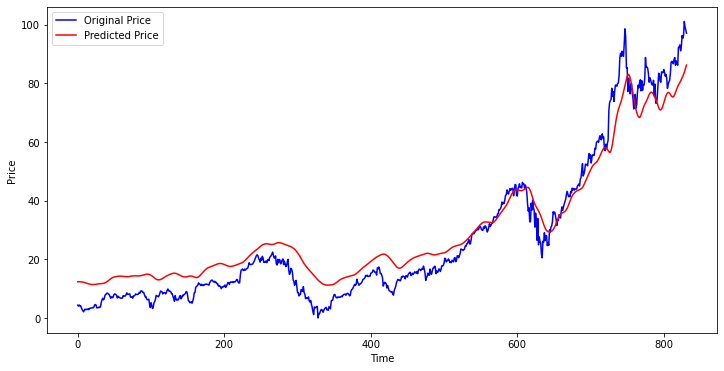

In [64]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_predicted,'r',label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [65]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [ ]:

import seaborn as sns

